In [40]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np

In [44]:
sleep = pd.read_csv('../fitbit_all_data/sleep.csv')
sleep=sleep.rename(columns={'Unnamed: 0.1':'datetime','value':'sleep'})

In [45]:
sleep

,Unnamed: 0,datetime,dateTime,user_id,sleep
0,0,2021-01-11 00:14:00,00:14:00,100,3
1,1,2021-01-11 00:15:00,00:15:00,100,2
2,2,2021-01-11 00:16:00,00:16:00,100,2
3,3,2021-01-11 00:17:00,00:17:00,100,1
4,4,2021-01-11 00:18:00,00:18:00,100,2
...,...,...,...,...,...
521728,449,2021-01-08 07:36:00,07:36:00,100,1
521729,450,2021-01-08 07:37:00,07:37:00,100,1
521730,451,2021-01-08 07:38:00,07:38:00,100,1
521731,452,2021-01-08 07:39:00,07:39:00,100,1


In [49]:
sleep['datetime'] = pd.to_datetime(sleep['datetime'])
sleep['date'] = sleep['datetime'].dt.date
sleep_agg = sleep.groupby(['date','user_id','sleep'],as_index=False).count()
sleep_agg[['sleep_1','sleep_2','sleep_3']] = 0
sleep_agg.loc[sleep_agg['sleep']==1, 'sleep_1'] = sleep_agg['datetime']
sleep_agg.loc[sleep_agg['sleep']==2, 'sleep_2'] = sleep_agg['datetime']
sleep_agg.loc[sleep_agg['sleep']==3, 'sleep_3'] = sleep_agg['datetime']
sleep_agg=sleep_agg.groupby(['date','user_id'],as_index=False).sum()
# sleep_agg.to_csv('./sleep.csv')

<AxesSubplot:>

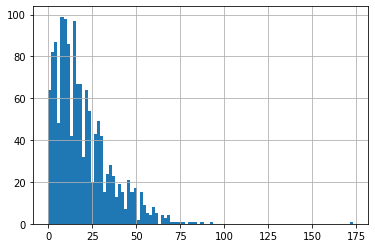

In [56]:
sleep_agg['sleep_2'].hist(bins=100)